# Ken Lloyd O. Alcoreza — Dengue Analysis (Final)

In [1]:
import pandas as pd
df = pd.read_csv("dengue.csv")
df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
 dengue = pd.read_csv('dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Year'] = dengue['Year'].astype('int')

In [8]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

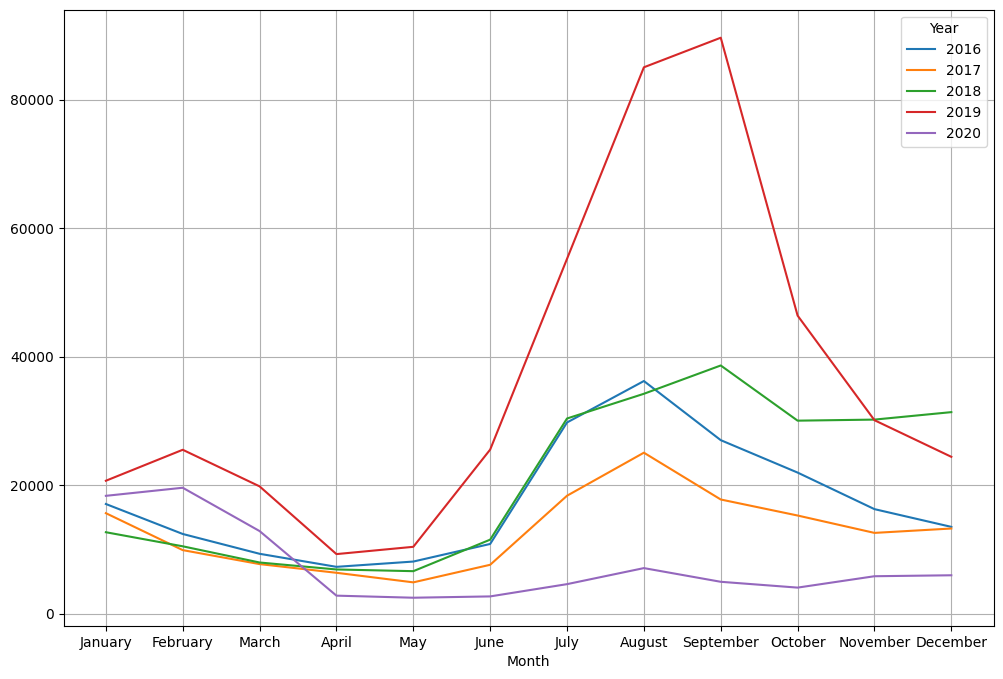

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

**Insight:**: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

In [10]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


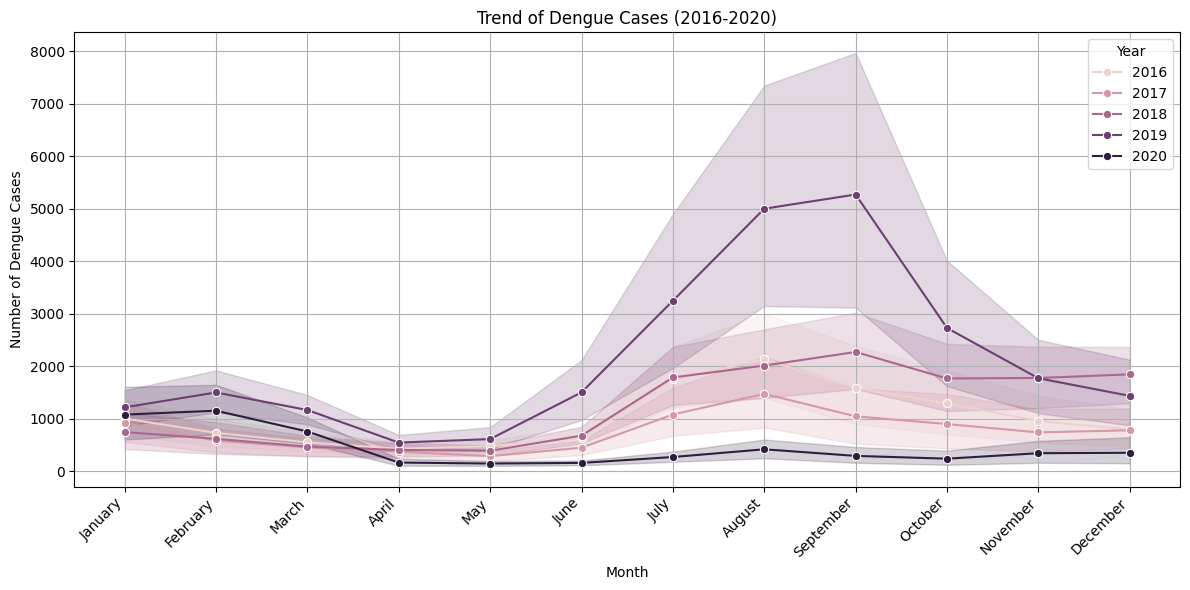

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

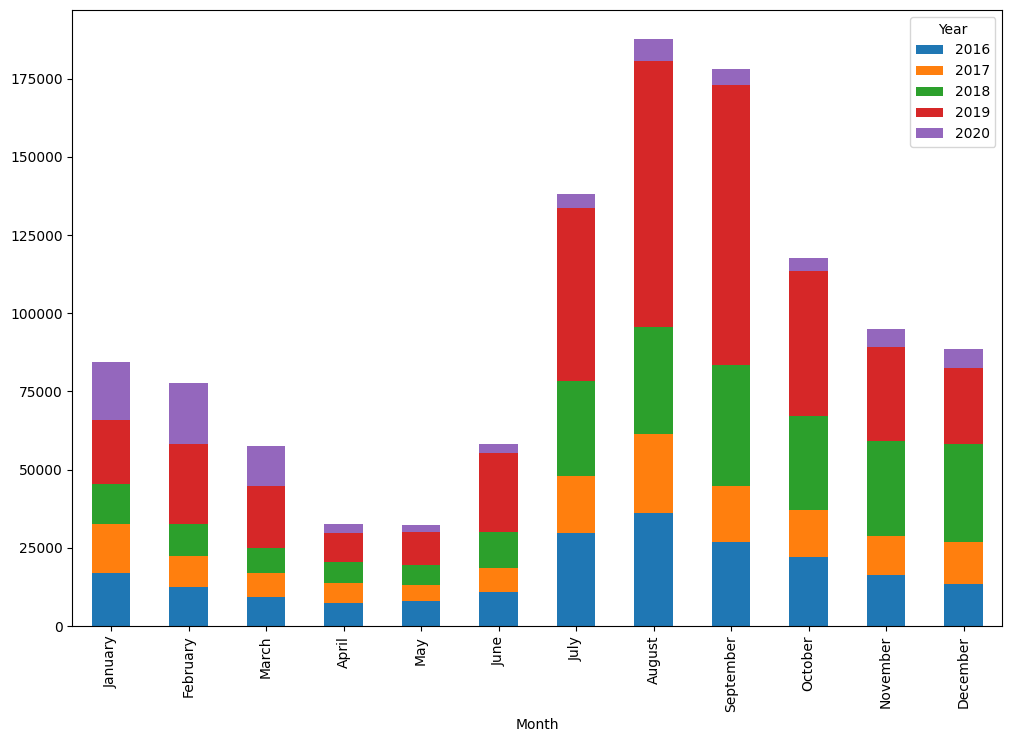

In [12]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

**Insight:**: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

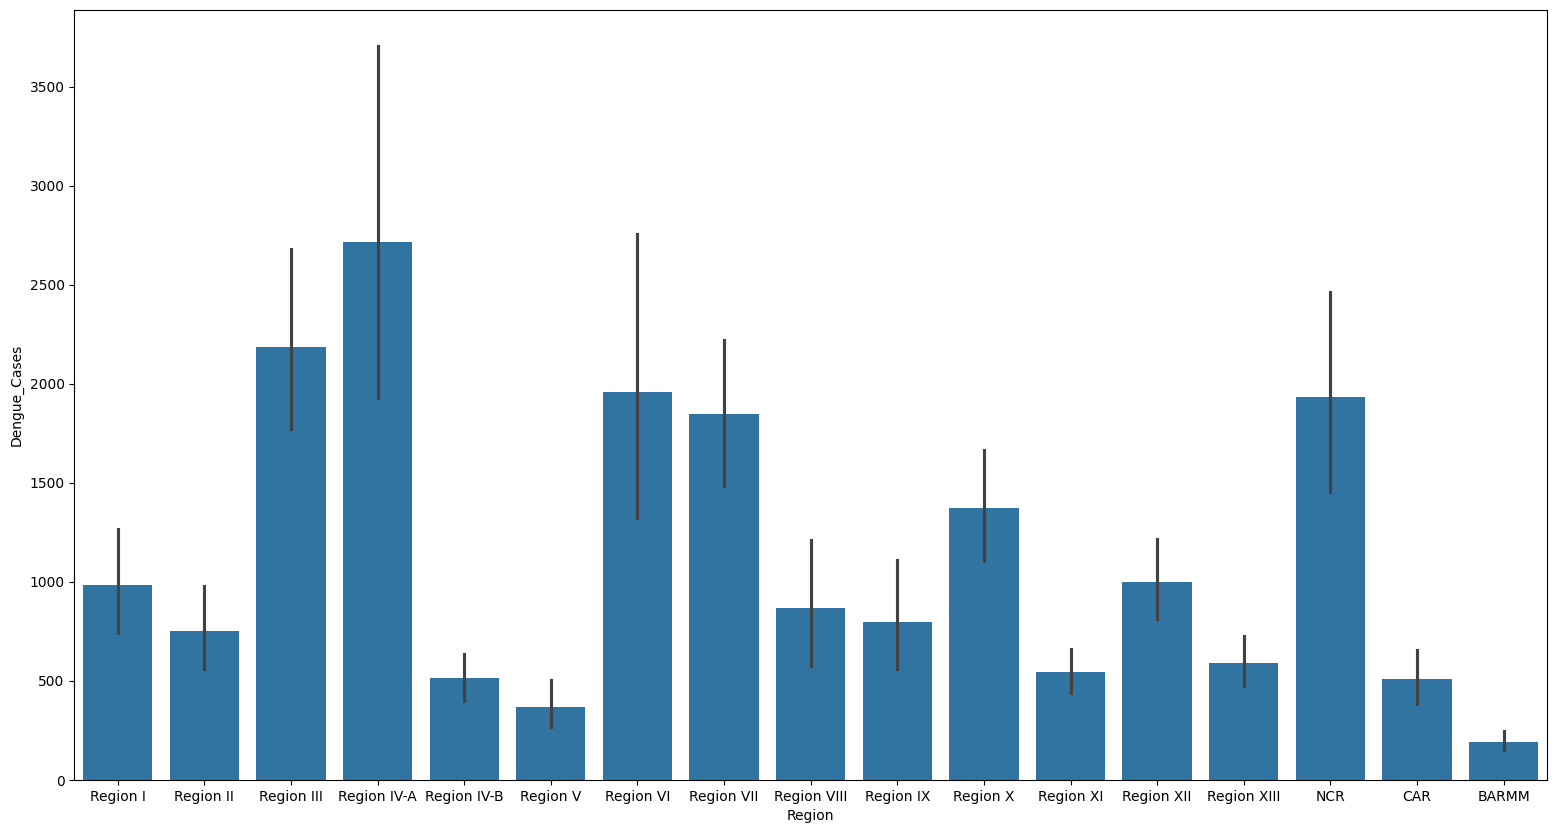

In [13]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

**Insight:**: The visualization shows trends and peaks that help identify high-risk periods.

In [14]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [15]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [16]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [17]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


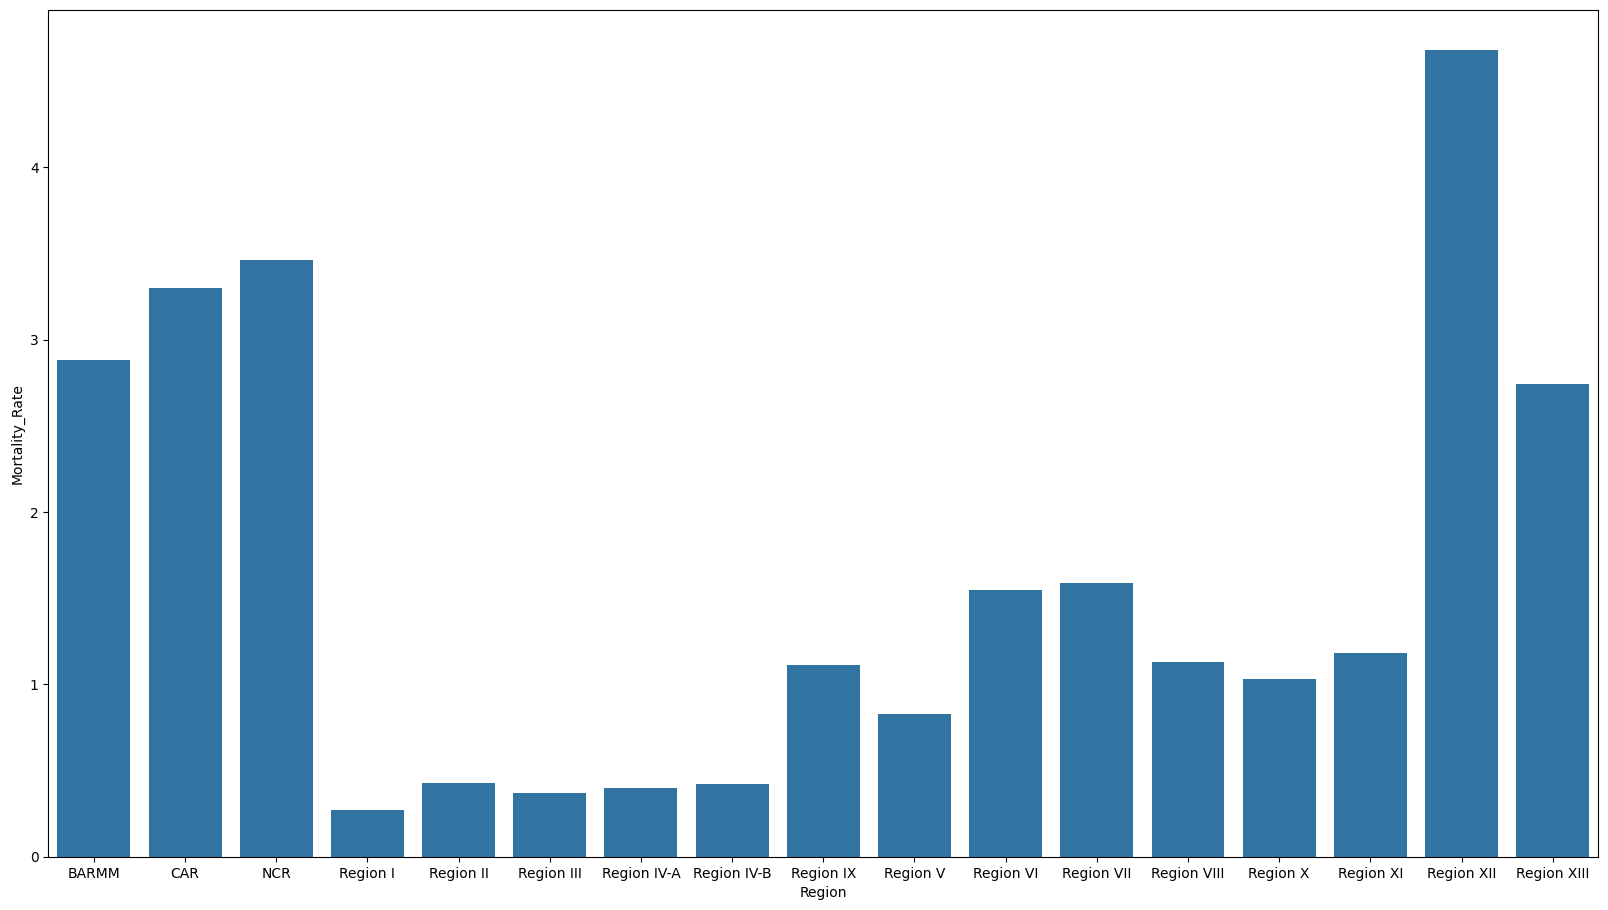

In [18]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

**Insight:**: The visualization shows trends and peaks that help identify high-risk periods.

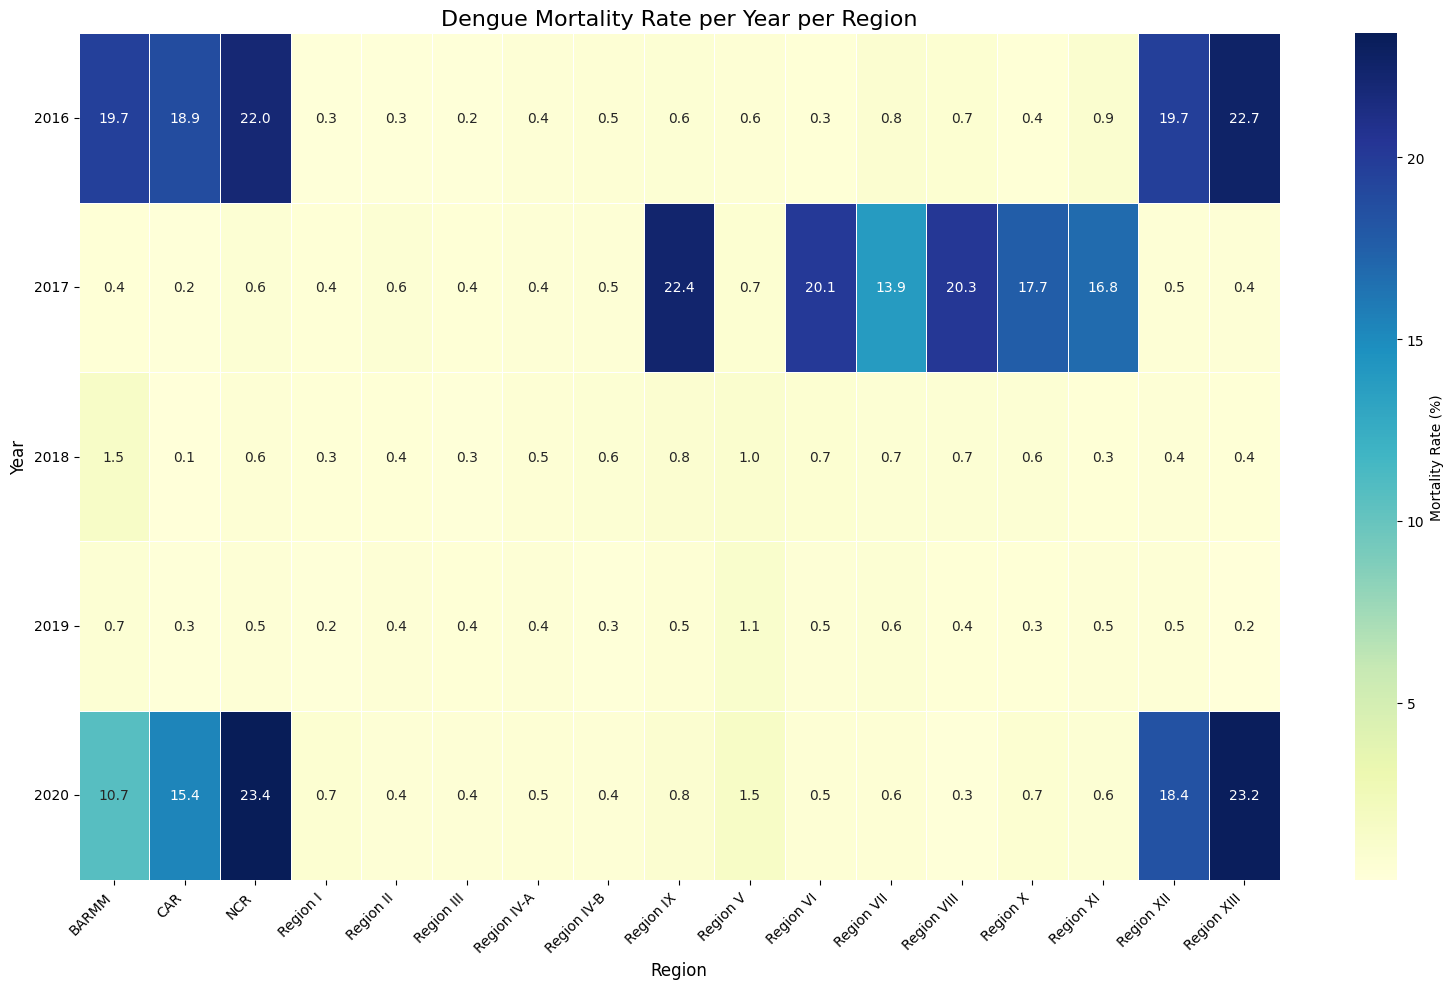

In [19]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

In [20]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016,Region I,705,1,0.141844
1,February,2016,Region I,374,0,0.000000
2,March,2016,Region I,276,0,0.000000
3,April,2016,Region I,240,2,0.833333
4,May,2016,Region I,243,1,0.411523
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.000000
1016,September,2020,BARMM,16,8,50.000000
1017,October,2020,BARMM,13,9,69.230769
1018,November,2020,BARMM,15,1,6.666667


In [21]:
dengue['Month'] = dengue['Month'].astype('str')

In [22]:
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

dengue = dengue.sort_values('Date')

In [23]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()

In [25]:
monthly_cases

,Date,Dengue_Cases
0,2016-01-01,2993
1,2016-02-01,2035
2,2016-03-01,1327
3,2016-04-01,838
4,2016-05-01,714
5,2016-06-01,778
6,2016-07-01,2270
7,2016-08-01,3218
8,2016-09-01,3454
9,2016-10-01,3175


In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\kenll\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
840,January,2016,NCR,1261,4,0.317209,2016-01-01
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01
120,January,2016,Region III,1976,3,0.151822,2016-01-01
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01
899,December,2020,NCR,658,4,0.607903,2020-12-01
59,December,2020,Region I,1081,1,0.092507,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01


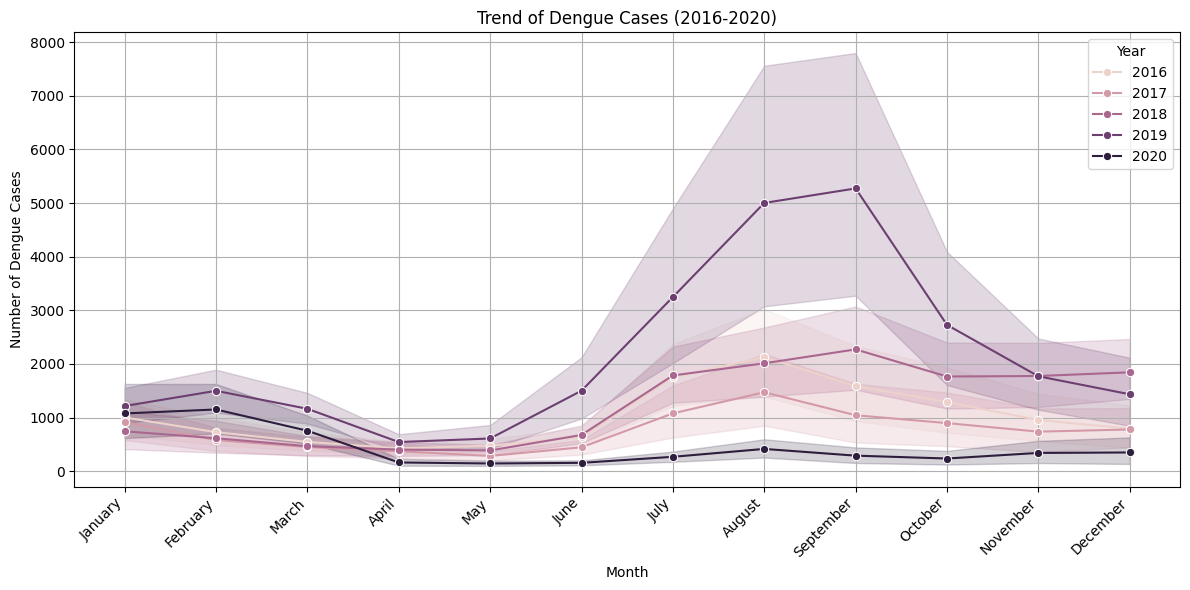

In [28]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

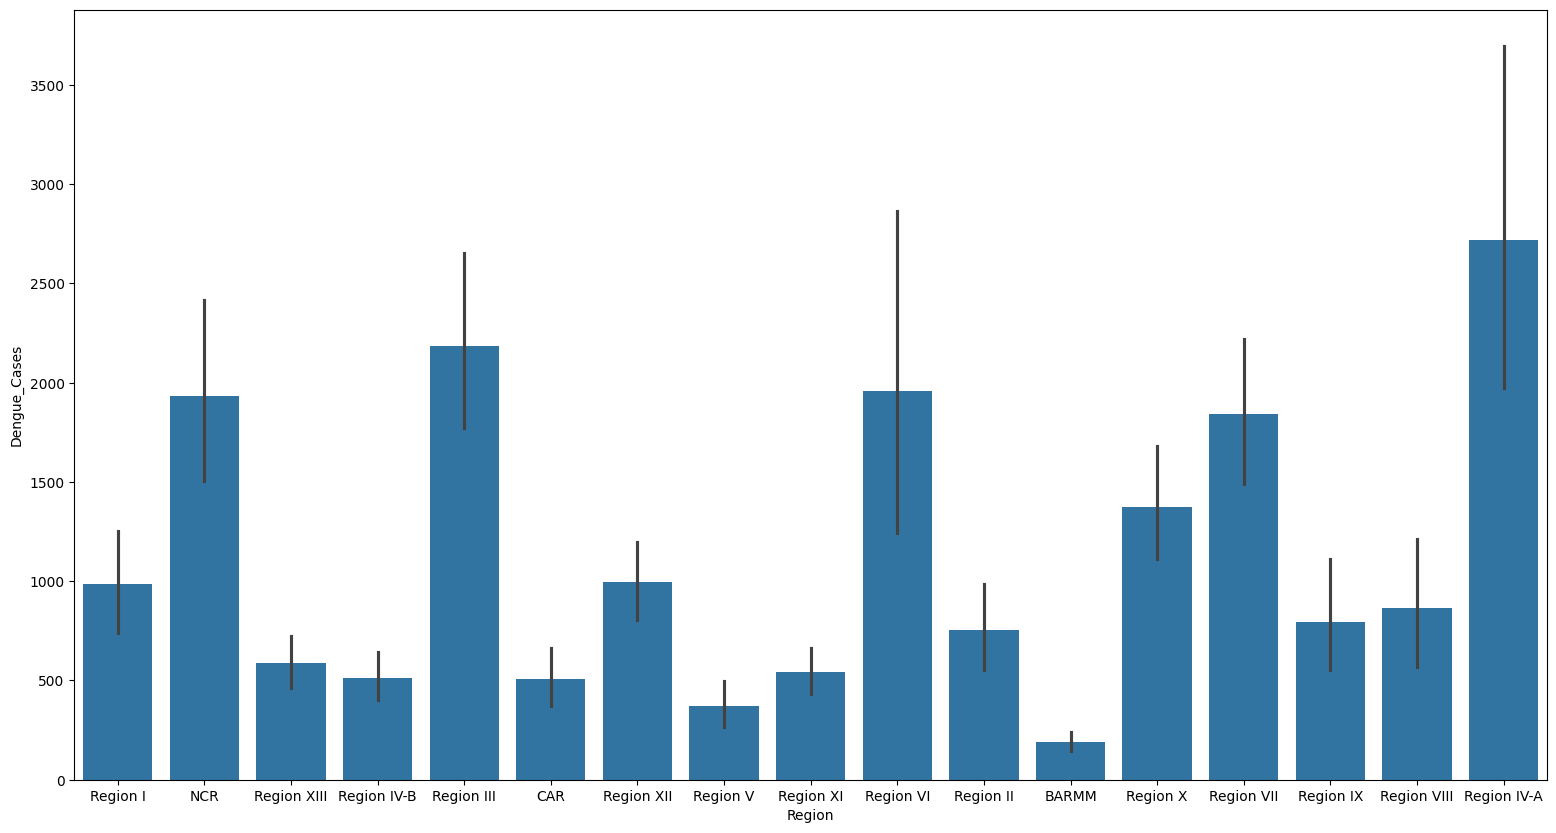

In [30]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

**Insight:** The visualization shows trends and peaks that help identify high-risk periods.

In [31]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [32]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [33]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [34]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


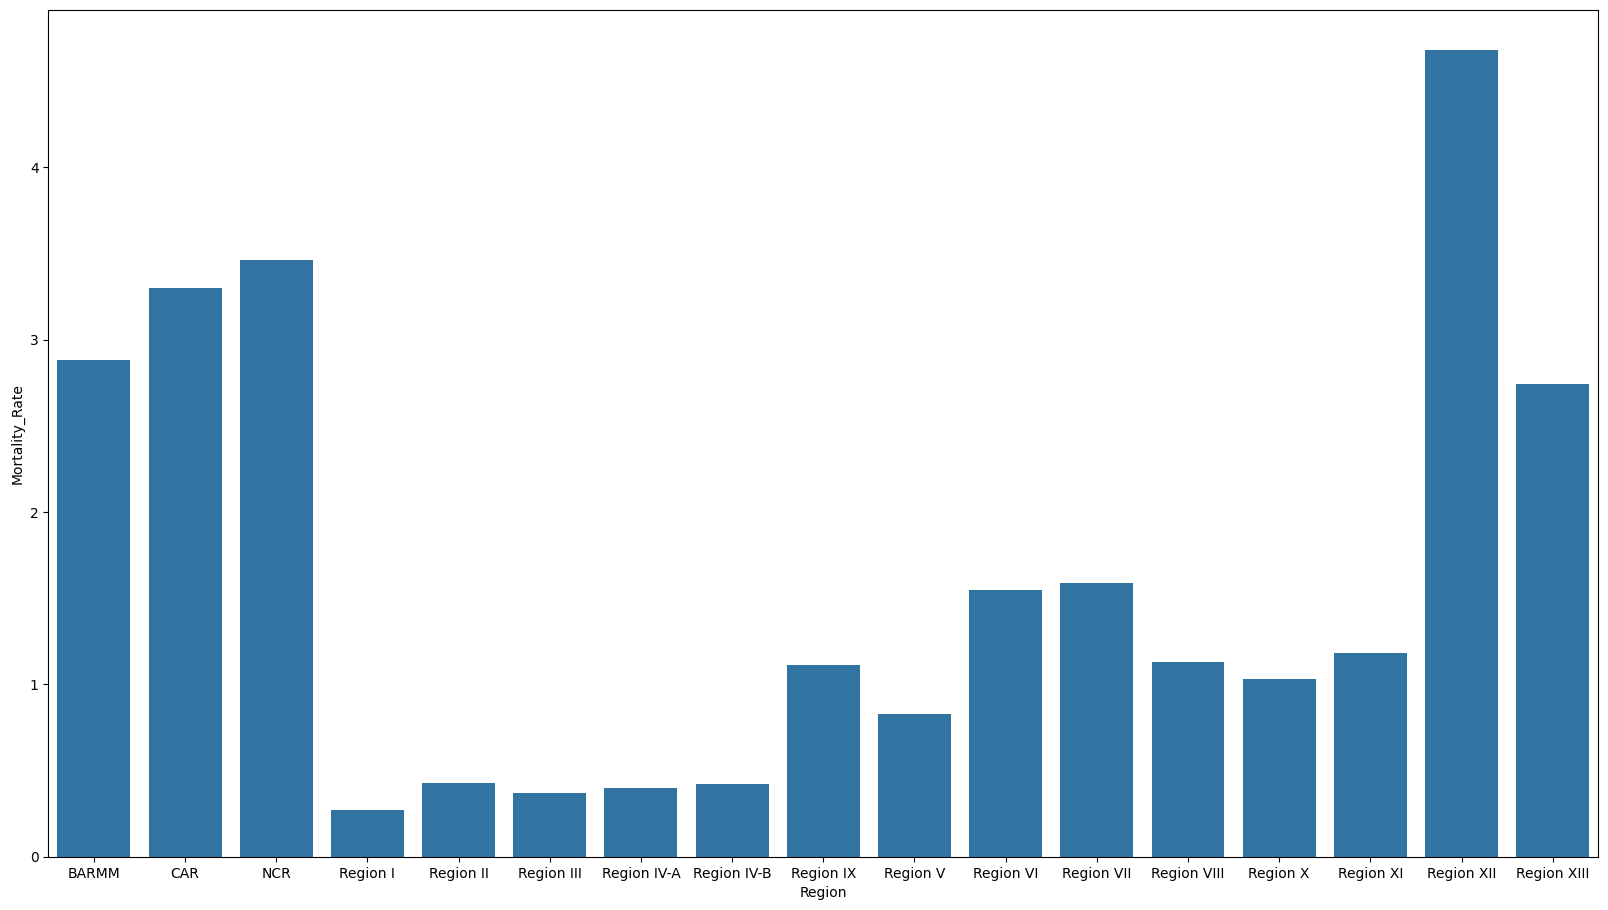

In [35]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

**Insight:**  The visualization shows trends and peaks that help identify high-risk periods.

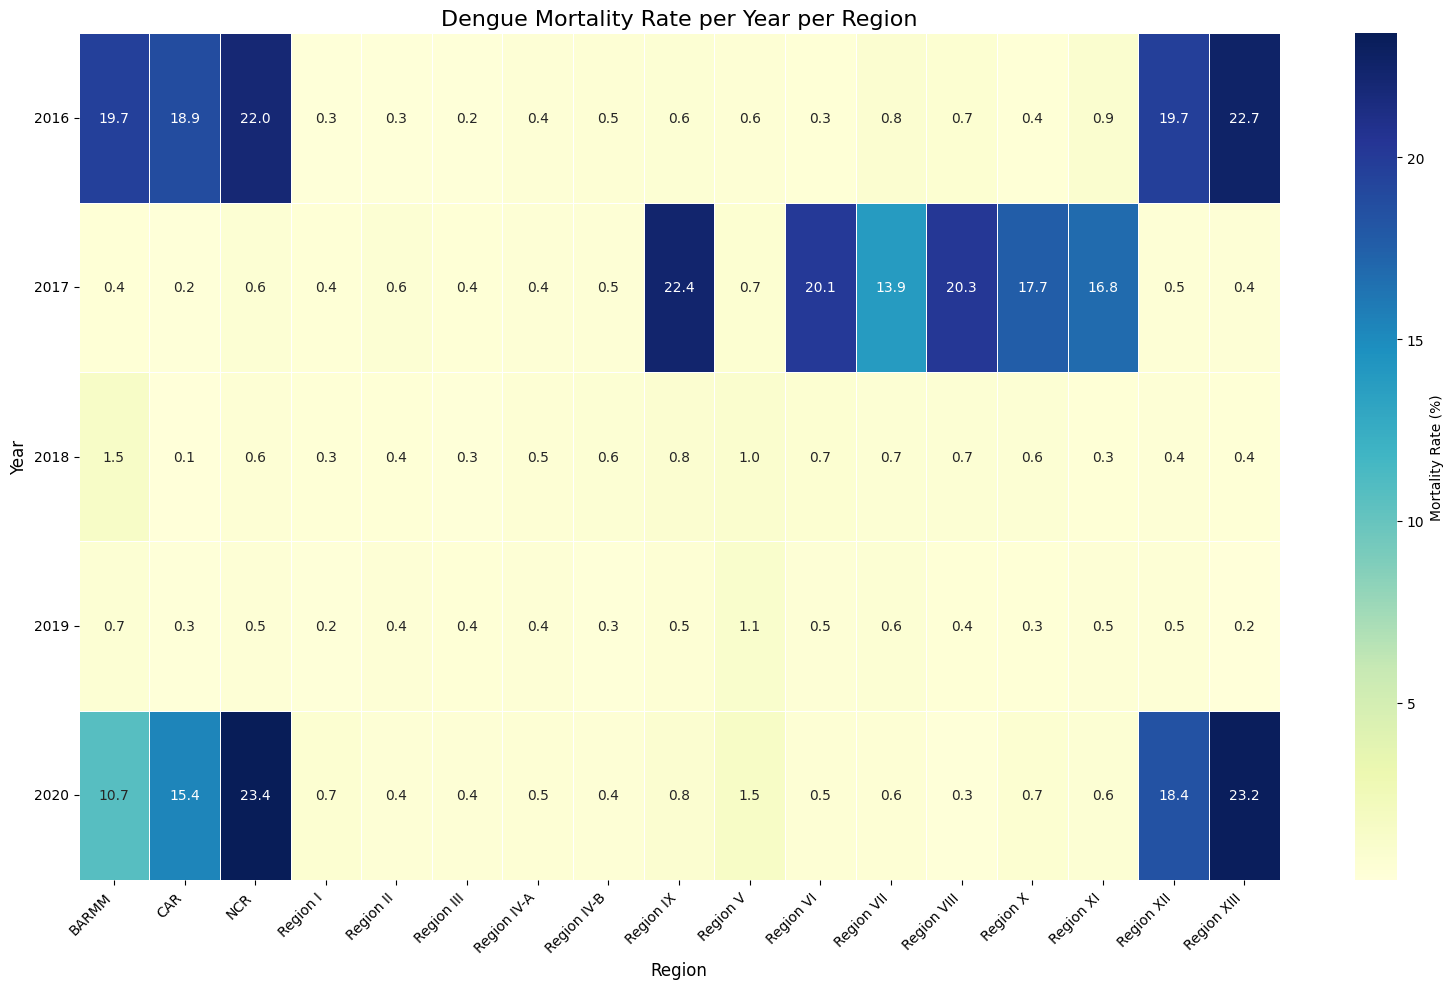

In [36]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:** Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

In [37]:
dengue['Month'] = dengue['Month'].astype('str')

In [38]:
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

dengue = dengue.sort_values('Date')

In [39]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()

In [40]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
180,January,2016,Region IV-A,2993,14,0.467758,2016-01-01
480,January,2016,Region VIII,469,4,0.852878,2016-01-01
540,January,2016,Region IX,596,2,0.335570,2016-01-01
420,January,2016,Region VII,1690,10,0.591716,2016-01-01
...,...,...,...,...,...,...,...
539,December,2020,Region VIII,41,0,0.000000,2020-12-01
419,December,2020,Region VI,138,0,0.000000,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01
239,December,2020,Region IV-A,527,4,0.759013,2020-12-01


In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1)
y = monthly_cases['Dengue_Cases'].values

model = LinearRegression()
model.fit(X, y)

monthly_cases['Predicted_Cases'] = model.predict(X)

r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")

The model explains 1.7% of the variation in dengue cases.


In [42]:
monthly_cases

,Date,Dengue_Cases,Date_Ordinal,Predicted_Cases
0,2016-01-01,2993,735964,1946.568049
1,2016-02-01,2035,735995,1973.180297
2,2016-03-01,1327,736024,1998.075625
3,2016-04-01,838,736055,2024.687873
4,2016-05-01,714,736085,2050.441661
5,2016-06-01,778,736116,2077.053908
6,2016-07-01,2270,736146,2102.807696
7,2016-08-01,3218,736177,2129.419944
8,2016-09-01,3454,736208,2156.032191
9,2016-10-01,3175,736238,2181.785979


In [43]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
180,January,2016,Region IV-A,2993,14,0.467758,2016-01-01
480,January,2016,Region VIII,469,4,0.852878,2016-01-01
540,January,2016,Region IX,596,2,0.335570,2016-01-01
420,January,2016,Region VII,1690,10,0.591716,2016-01-01
...,...,...,...,...,...,...,...
539,December,2020,Region VIII,41,0,0.000000,2020-12-01
419,December,2020,Region VI,138,0,0.000000,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01
239,December,2020,Region IV-A,527,4,0.759013,2020-12-01


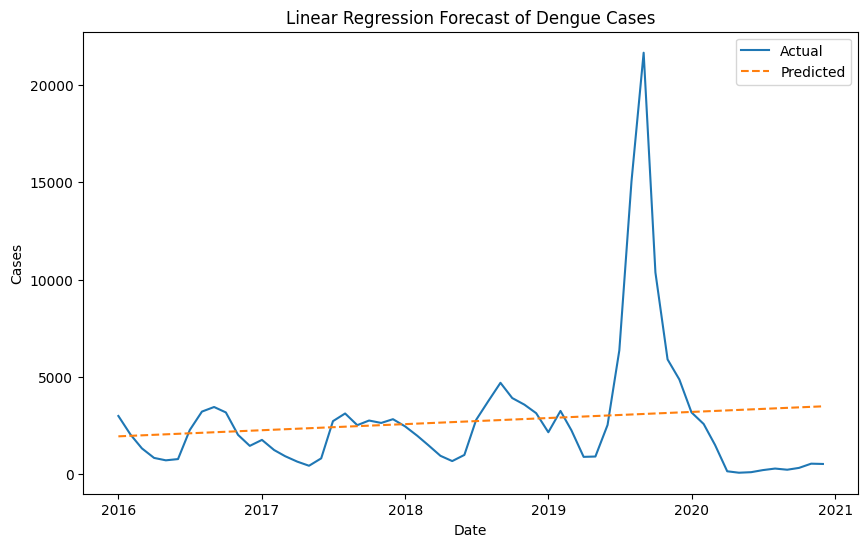

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

**Insight:** Simple insight: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

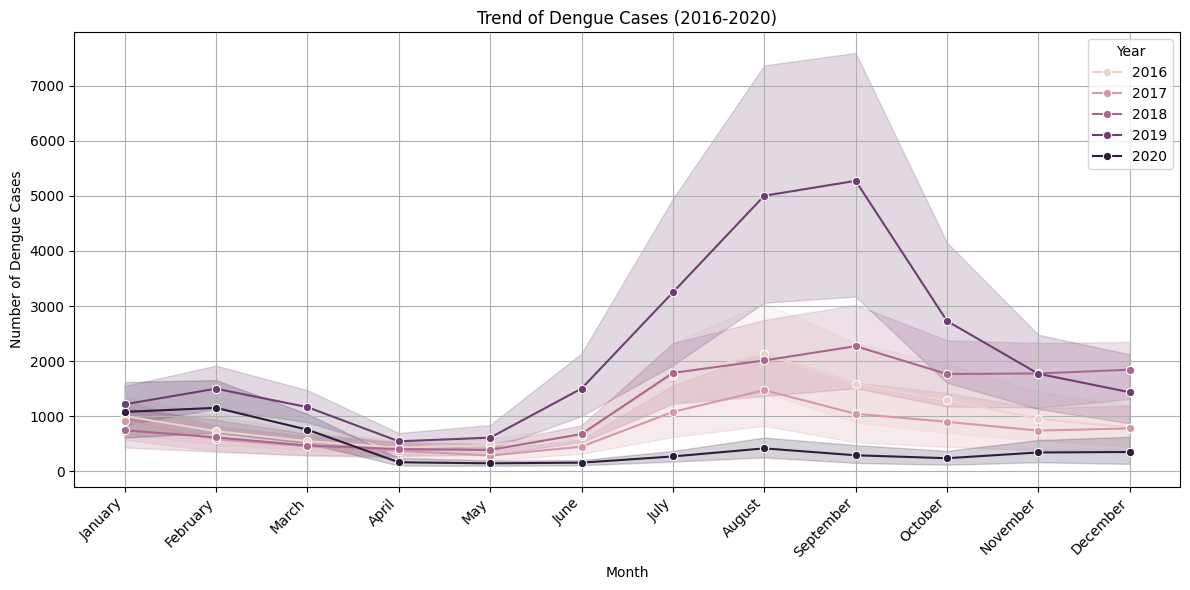

In [46]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** Simple insight: Monthly or grouped totals reveal when cases rise and fall; use these peaks to plan responses.

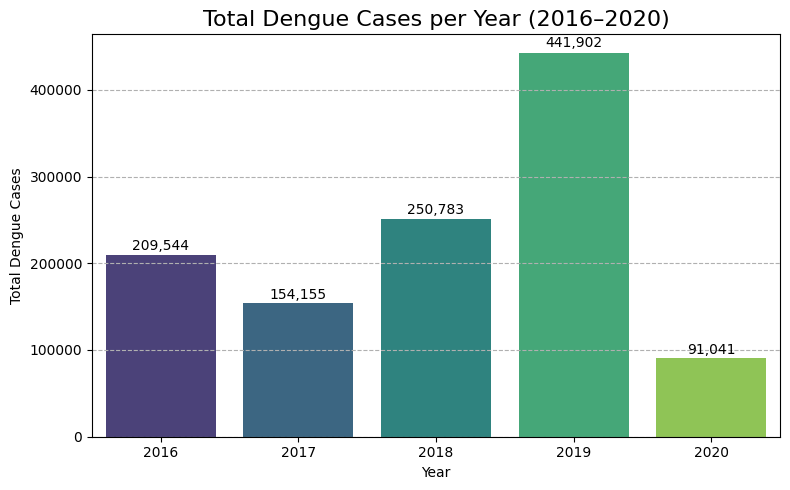

In [47]:
yearly_total = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Year', y='Dengue_Cases', data=yearly_total, palette='viridis')

for i, v in enumerate(yearly_total['Dengue_Cases']):
    ax.text(i, v + (v * 0.01), f"{v:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Dengue Cases per Year (2016–2020)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight:** The bar chart shows how dengue cases changed from 2016 to 2020 — years with taller bars mark outbreaks or higher infection rates.

**Insight:** If the later years show a drop, it could mean better control measures or reporting changes, while an upward trend suggests increasing risk and the need for stronger prevention.

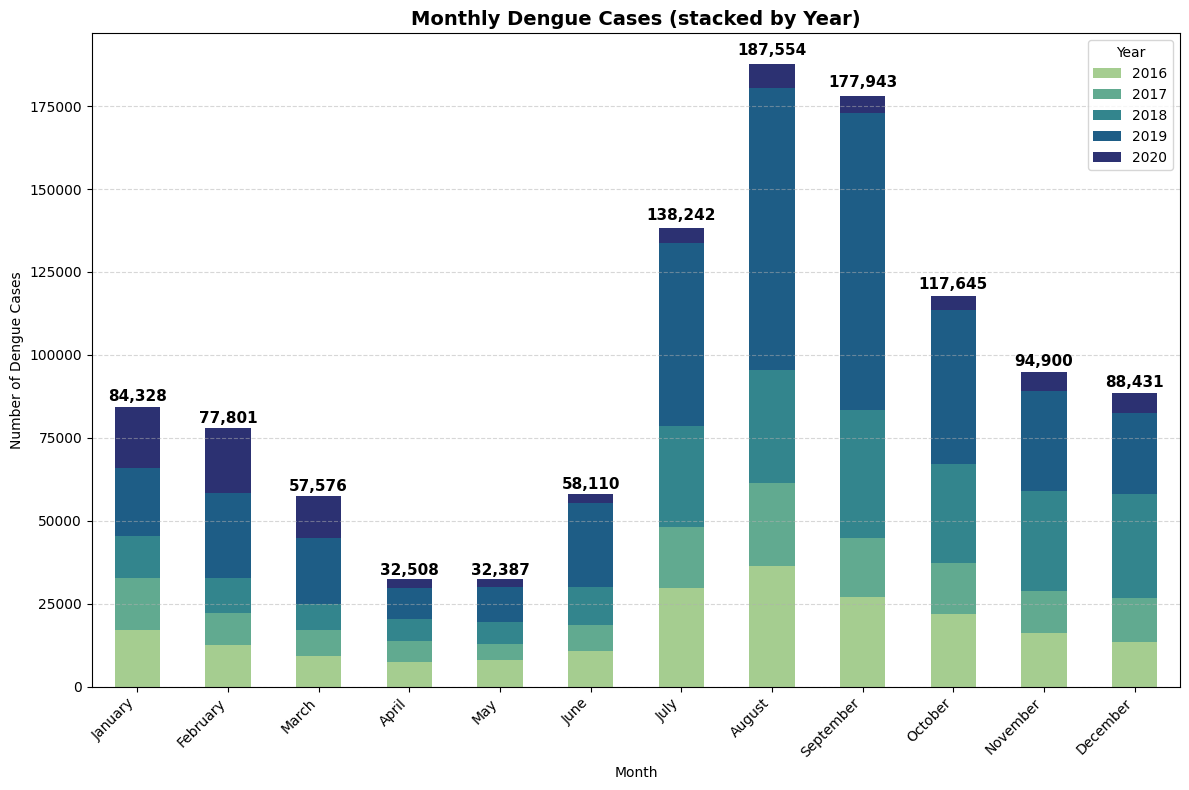

In [48]:
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_cases = (dengue.groupby(['Month','Year'])['Dengue_Cases'].sum().unstack(fill_value=0))
monthly_cases = monthly_cases.reindex(month_order).fillna(0)
monthly_total = monthly_cases.sum(axis=1).reset_index(name='Dengue_Cases')

ax = monthly_cases.plot(kind='bar', stacked=True, figsize=(12,8), colormap='crest')
totals = monthly_cases.sum(axis=1)

for i, total in enumerate(totals.values):
    ax.text(i, total + (total * 0.01), f"{int(total):,}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Monthly Dengue Cases (stacked by Year)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:** The stacked bars show which months consistently have higher dengue cases usually aligning with the rainy season when mosquito breeding increases.

**Insight:** Comparing colors in each month helps spot unusual spikes in certain years, hinting at outbreaks or weather patterns that worsened dengue spread.

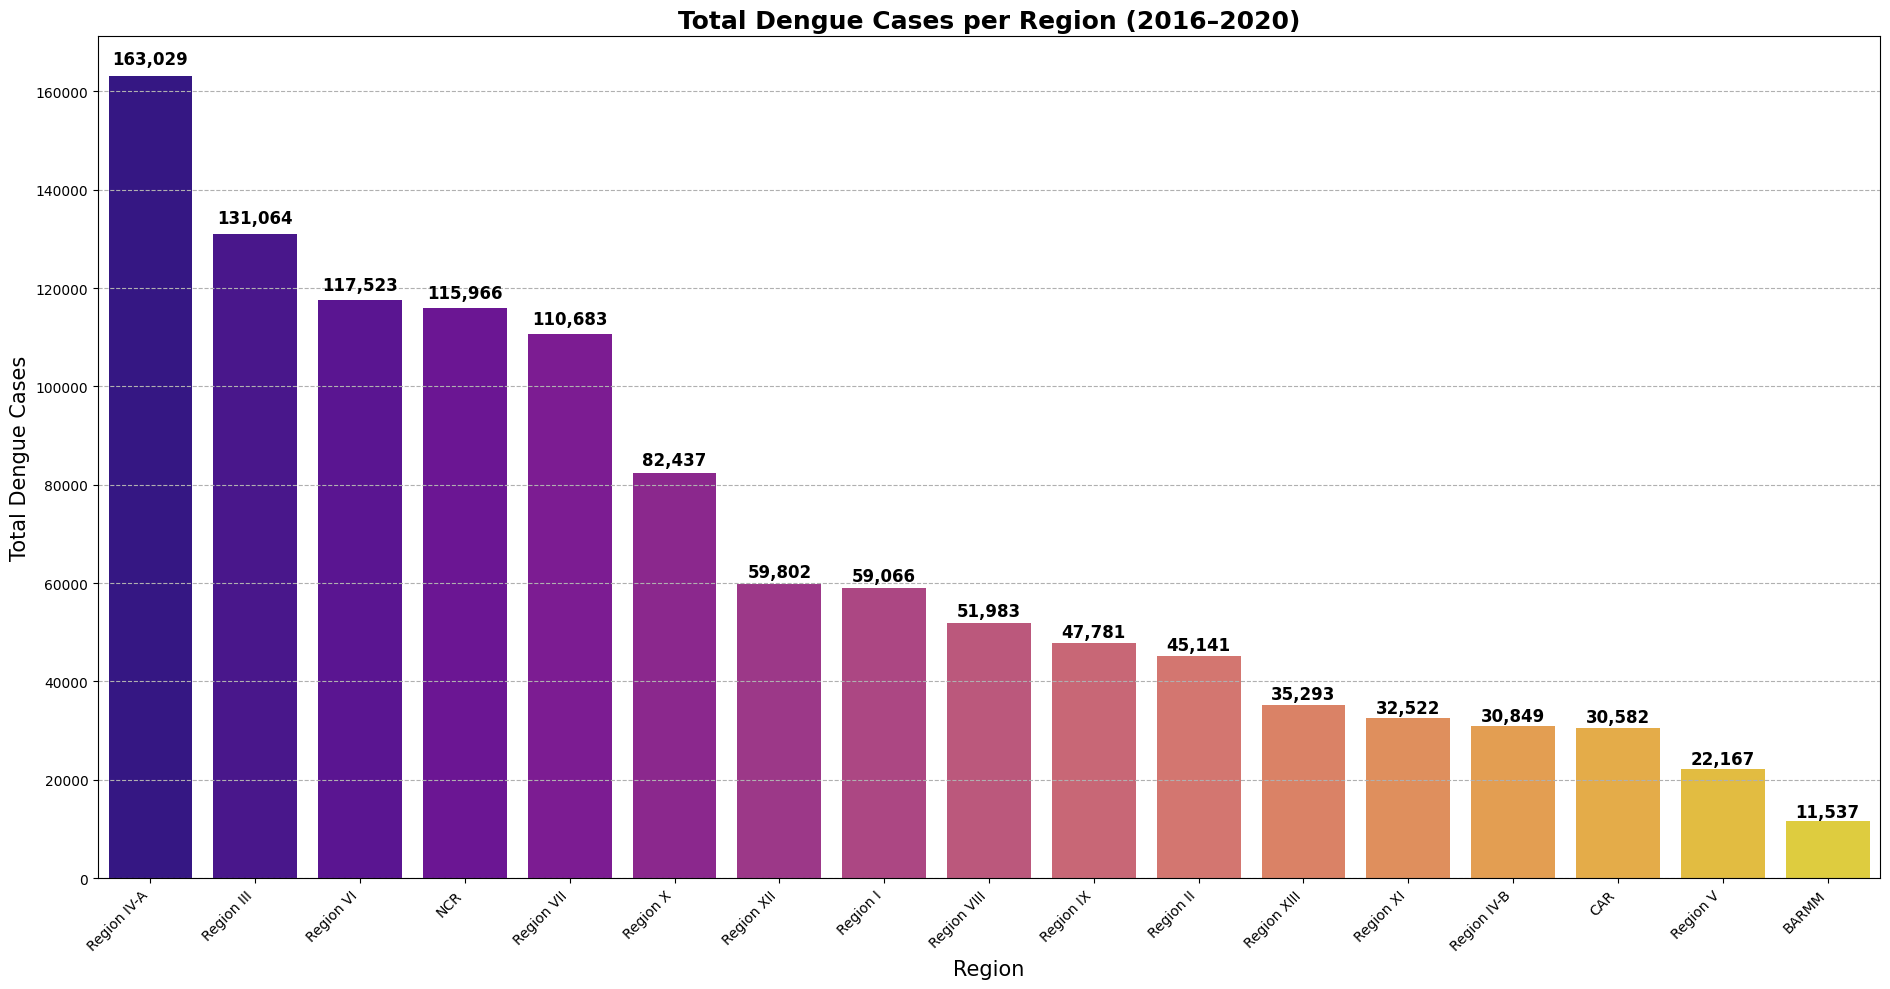

In [49]:
region_cases = dengue.groupby('Region', as_index=False)['Dengue_Cases'].sum()
region_cases = region_cases.sort_values(by='Dengue_Cases', ascending=False)

plt.figure(figsize=(19,10))
ax = sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', palette='plasma', order=region_cases['Region'])

for i, v in enumerate(region_cases['Dengue_Cases'].values):
    ax.text(i, v + (v * 0.01), f"{int(v):,}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Total Dengue Cases per Region (2016–2020)', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Dengue Cases', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--',)
plt.tight_layout()
plt.show()

**Insight:** The chart clearly highlights which regions experienced the highest number of dengue cases, pointing to areas that may need stronger mosquito control and health campaigns.

**Insight:** Regions with consistently lower bars might have better prevention measures or fewer risk factors, serving as good models for other areas.

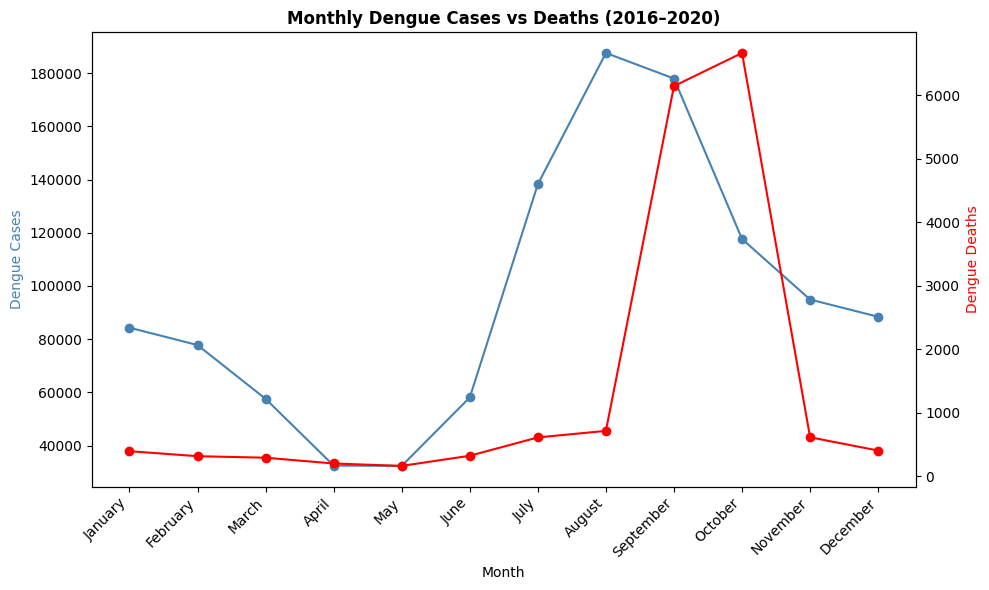

In [50]:
monthly = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
fig, cases_ax = plt.subplots(figsize=(10,6))
deaths_ax = cases_ax.twinx()

cases_ax.plot(monthly["Month"], monthly["Dengue_Cases"], color="steelblue", marker="o", label="Cases")
deaths_ax.plot(monthly["Month"], monthly["Dengue_Deaths"], color="red", marker="o", label="Deaths")

cases_ax.set_xlabel("Month")
cases_ax.set_ylabel("Dengue Cases", color="steelblue")
deaths_ax.set_ylabel("Dengue Deaths", color="red")
plt.title("Monthly Dengue Cases vs Deaths (2016–2020)", fontweight="bold")

plt.setp(cases_ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:** The lines show that dengue deaths often rise and fall along with the number of cases, suggesting that more infections lead to more fatalities during peak months.

**Insight:** Months with sharp increases in both cases and deaths may point to outbreaks or delays in treatment and prevention efforts.